# Placement Prediction Dataset

# Performing EDA and Machine Learning

Predicting whether the student will be placed or not with respect to the given inputs. 3 ML algorithms are used such as Logistic Regression, Random Forest and Stochastic Gradient Descent(SGD)

In [1]:
# Importing libraries and required algorithms

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style("darkgrid", {"grid.color": ".6"})
pd.set_option('display.width', 2000)
np.set_printoptions(linewidth=2000)
pd.set_option('display.max_columns', 20)


Placement Dataset is available from the following link:

https://www.kaggle.com/sevdanurgenc/placement-data-full-class 

In [2]:
placement = pd.read_csv("placement_data.csv")

placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
placement.shape

(215, 15)

There are totally 215 rows and 15 columns

In [4]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
# Checking for duplicate values in the dataset

duplicate_df = placement[placement.duplicated()]
duplicate_df.shape

(0, 15)

In [6]:
# Checking any null values

placement.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


There is totally 67 empty rows for salary column. Now we are checking how many people have not been placed.


In [7]:
# grouping data according to status
group = placement.groupby('status')
group1 = group.get_group('Placed')
group2 = group.get_group('Not Placed')
group2.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN


In [8]:
group2.shape

(67, 15)

Here there are 67 peoples who have not yet placed. So those who have not placed dont have salary also.
Therefore we are not going to fill the empty values for salary. Just going to leave it as it is.


Text(0.5, 1.0, 'Outliers Variable Distribution')

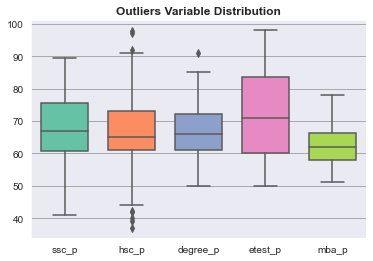

In [9]:
# Checking for outliers in the dataset

attribute = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
sns.boxplot(data=placement[attribute], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 12, fontweight = 'bold')



We could see few outliers in hsc_p column. We are going to remove those few too.


In [10]:
# Removing outliers in hsc_p

Q1 = placement.hsc_p.quantile(0.25)
Q3 = placement.hsc_p.quantile(0.75)
IQR = Q3 - Q1
placement = placement[(placement.hsc_p >= Q1 - 1.5*IQR) & (placement.hsc_p <= Q3 + 1.5*IQR)]

Text(0.5, 1.0, 'After removing outliers')

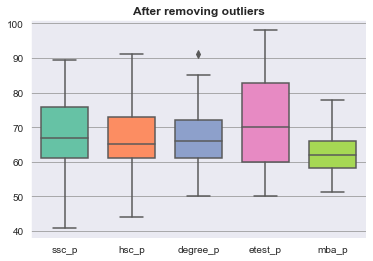

In [11]:
sns.boxplot(data=placement[attribute], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("After removing outliers", fontsize = 12, fontweight = 'bold')


In [12]:
placement.shape

(207, 15)

8 rows have been removed as outliers and remaining 207 rows we have now.

# Some Graphical Visualizations
# CountPlot

In [13]:
# Number of Male and female placed and not placed

placement.groupby(['gender','status']).count()['sl_no']

gender  status    
F       Not Placed    27
        Placed        46
M       Not Placed    35
        Placed        99
Name: sl_no, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

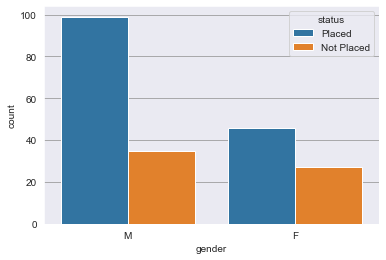

In [14]:
sns.countplot(data=placement, x='gender', hue='status')

# CatPlot

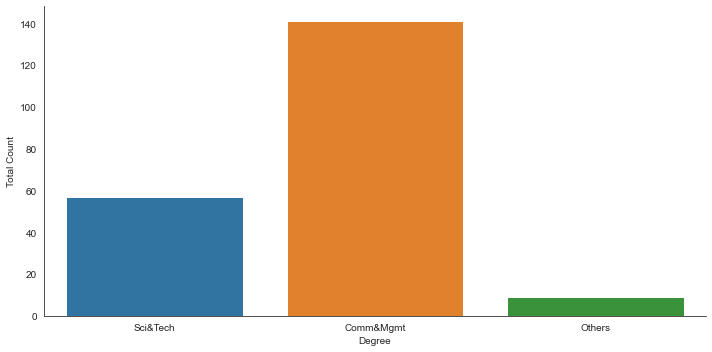

In [15]:
# Count of students in different degree's

with sns.axes_style('white'):
    degree = sns.catplot("degree_t", data=placement, aspect=2,
                       kind="count")
    degree.set_axis_labels("Degree", "Total Count");

# Donut Graph

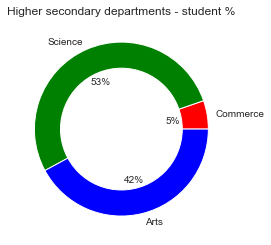

In [16]:
data = placement.groupby('hsc_s').sum()['sl_no']
labels = placement['hsc_s'].unique()

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(data, labels=labels, colors=['red','green','blue'], autopct='%.0f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Higher secondary departments - student %')

# Show the graph
plt.show()

# Heat Map

<AxesSubplot:>

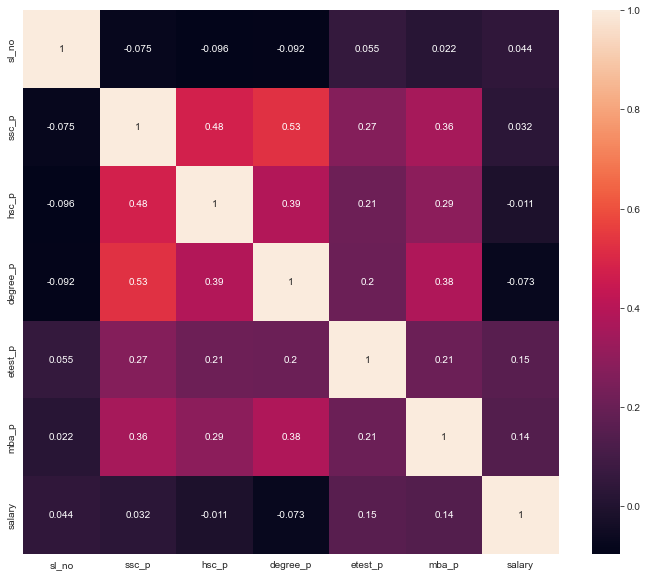

In [17]:
# Identifying correlation among the features
plt.figure(figsize=(12,10))
corr = placement.corr()
sns.heatmap(corr, annot = True)

There is no correlation between them

# Convert categorized values to numerical values

In [18]:
placement['gender'].replace({'M':1, 'F':0}, inplace=True)                
placement['ssc_b'].replace({'Central':1, 'Others':0}, inplace=True)
placement['hsc_b'].replace({'Central':1, 'Others':0}, inplace=True)
placement['workex'].replace({'Yes':1, 'No':0}, inplace=True)
placement['specialisation'].replace({'Mkt&Fin':1, 'Mkt&HR':0}, inplace=True)
placement['status'].replace({'Placed':1, 'Not Placed':0}, inplace=True)

placement.head(2)

/Users/mani/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,0,55.0,0,58.80,1,270000.0
1,2,1,79.33,1,78.33,0,Science,77.48,Sci&Tech,1,86.5,1,66.28,1,200000.0


In [19]:
cat_cols=placement.select_dtypes('object')

cat_col_encode = pd.get_dummies(cat_cols)

# drop categorical columns
placement.drop(columns=cat_cols, axis=1, inplace=True)

# combine new columns with original data
placement = pd.concat([placement, cat_col_encode], axis=1)
placement.head(5)

/Users/mani/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,1,67.00,0,91.00,0,58.00,0,55.0,0,58.80,1,270000.0,0,1,0,0,0,1
1,2,1,79.33,1,78.33,0,77.48,1,86.5,1,66.28,1,200000.0,0,0,1,0,0,1
2,3,1,65.00,1,68.00,1,64.00,0,75.0,1,57.80,1,250000.0,1,0,0,1,0,0
3,4,1,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,NaN,0,0,1,0,0,1
4,5,1,85.80,1,73.60,1,73.30,0,96.8,1,55.50,1,425000.0,0,1,0,1,0,0


In [20]:
X=placement.drop(["sl_no", "status", "salary"],axis=1)
y=placement["status"]

# Scaling the data

In [21]:
scale = StandardScaler()
scaled_df = scale.fit_transform(X)
scaled_data = pd.DataFrame(scaled_df, columns=X.columns)
scaled_X = scaled_data

# Splitting the dataset for training and testing

In [22]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state = 42)


# Logistic Regression

Algorithm to use in the optimization problem.

There are 5 types of solver that can be used 
    ---> ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’;
    
    Default used is 'lbfgs’

To choose a solver, we consider the following aspects:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
‘liblinear’ is limited to one-versus-rest schemes.

We have only small dataset so we go with liblinear solver.

In [23]:
log_model = LogisticRegression(solver='liblinear', random_state = 0)
log_model.fit(X_train, y_train)
training_predictions = log_model.predict(X_train)
testing_predictions = log_model.predict(X_test)

training_score = accuracy_score(y_train, training_predictions)
testing_score = accuracy_score(y_test, testing_predictions)

print(f'Training Accuracy Score is ' + '{:.2f}'.format(training_score*100) + '%\n\n Testing Accuracy Score is ' + '{:.2f}'.format(testing_score*100) + '%')

Training Accuracy Score is 87.88%

 Testing Accuracy Score is 85.71%


# Stochastic Gradient Descent 

Mostly used when there is large datasets. Now we are using just for learning
There are many possible options for loss parameters:
    ---> ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’ ;
    
    Default one is 'hinge'
    
The ‘log’ loss gives logistic regression.
The ‘modified_huber’ is another smooth loss that brings tolerance to outliers as well as probability estimates. ‘squared_hinge’ is like hinge but is quadratically penalized. 
‘perceptron’ is the linear loss used by the perceptron algorithm.

In [24]:
sgd_model = SGDClassifier(loss='modified_huber', shuffle = True, random_state=101)
sgd_model.fit(X_train, y_train)
training_predictions = sgd_model.predict(X_train)
testing_predictions = sgd_model.predict(X_test)

training_score = accuracy_score(y_train, training_predictions)
testing_score = accuracy_score(y_test, testing_predictions)

print(f'Training Accuracy Score is ' + '{:.2f}'.format(training_score*100) + '%\n\n Testing Accuracy Score is ' + '{:.2f}'.format(testing_score*100) + '%')

Training Accuracy Score is 89.09%

 Testing Accuracy Score is 80.95%


# Random Forest Classifier

In [25]:
rand_model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=453)
rand_model.fit(X_train, y_train)
training_predictions = rand_model.predict(X_train)
testing_predictions = rand_model.predict(X_test)

training_score = accuracy_score(y_train, training_predictions)
testing_score = accuracy_score(y_test, testing_predictions)

print(f'Training Accuracy Score is ' + '{:.2f}'.format(training_score*100) + '%\n\n Testing Accuracy Score is ' + '{:.2f}'.format(testing_score*100) + '%')

Training Accuracy Score is 90.91%

 Testing Accuracy Score is 83.33%



We can see that Random Forest is giving more accuracy compared to others.
We are plotting the confusion matrix of that model

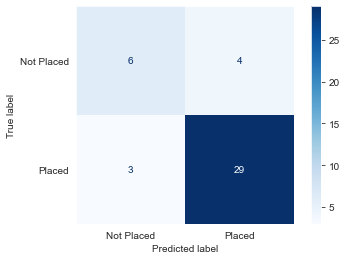

In [26]:
#Confusion_matrix of random forest classifier

plot_confusion_matrix(rand_model,
                      X_test, y_test,
                      cmap = plt.cm.Blues,
                      display_labels = ['Not Placed', 'Placed'])
plt.grid(False)
plt.show();